In [1]:
#Importing libraries
import pandas as pd
import os
import json
import csv
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [2]:
#Importing the generic functions created
import sys
sys.path.append('../src/utils/')
from eda import calculate_mode, plot_attribute_counts_bad_rate_count_type

In [3]:
bad_officer_appointments = '../data/bad_officer_appointments.csv'
good_officer_appointments = '../data/good_officer_appointments.csv'
officer_information_directory = '../data/officer_attribute_store/'

In [4]:
def extract_officer_filings_data(csv_file_path, json_directory):
    bad_officer_appointments = pd.read_csv(csv_file_path)

    unique_officer_numbers = bad_officer_appointments['officer_number'].unique()
    matched_officer_data = []

    for officer_number in unique_officer_numbers:
        json_file_path = os.path.join(json_directory, officer_number + '.json')

        if not os.path.isfile(json_file_path):
            continue

        with open(json_file_path, 'r') as file:
            json_data = json.load(file)

        if 'filings' in json_data and 'other' in json_data['filings']:
            other_filings = json_data['filings']['other']

            for company_number, filings_list in other_filings.items():
                for filing_info in filings_list:
                    filing_type = filing_info.get('type')
                    filing_category = filing_info.get('category')
                    filing_description = filing_info.get('description')
                    
                    matched_officer_data.append((
                        officer_number,
                        company_number,
                        filing_type,
                        filing_category,
                        filing_description
                    ))

    return pd.DataFrame(matched_officer_data, columns=['officer_number', 'company_number', 'filing_type', 'filing_category', 'filing_description'])

In [5]:
good_officer_company_filing_data = extract_officer_filings_data(good_officer_appointments,officer_information_directory)
bad_officer_company_filing_data = extract_officer_filings_data(bad_officer_appointments,officer_information_directory)

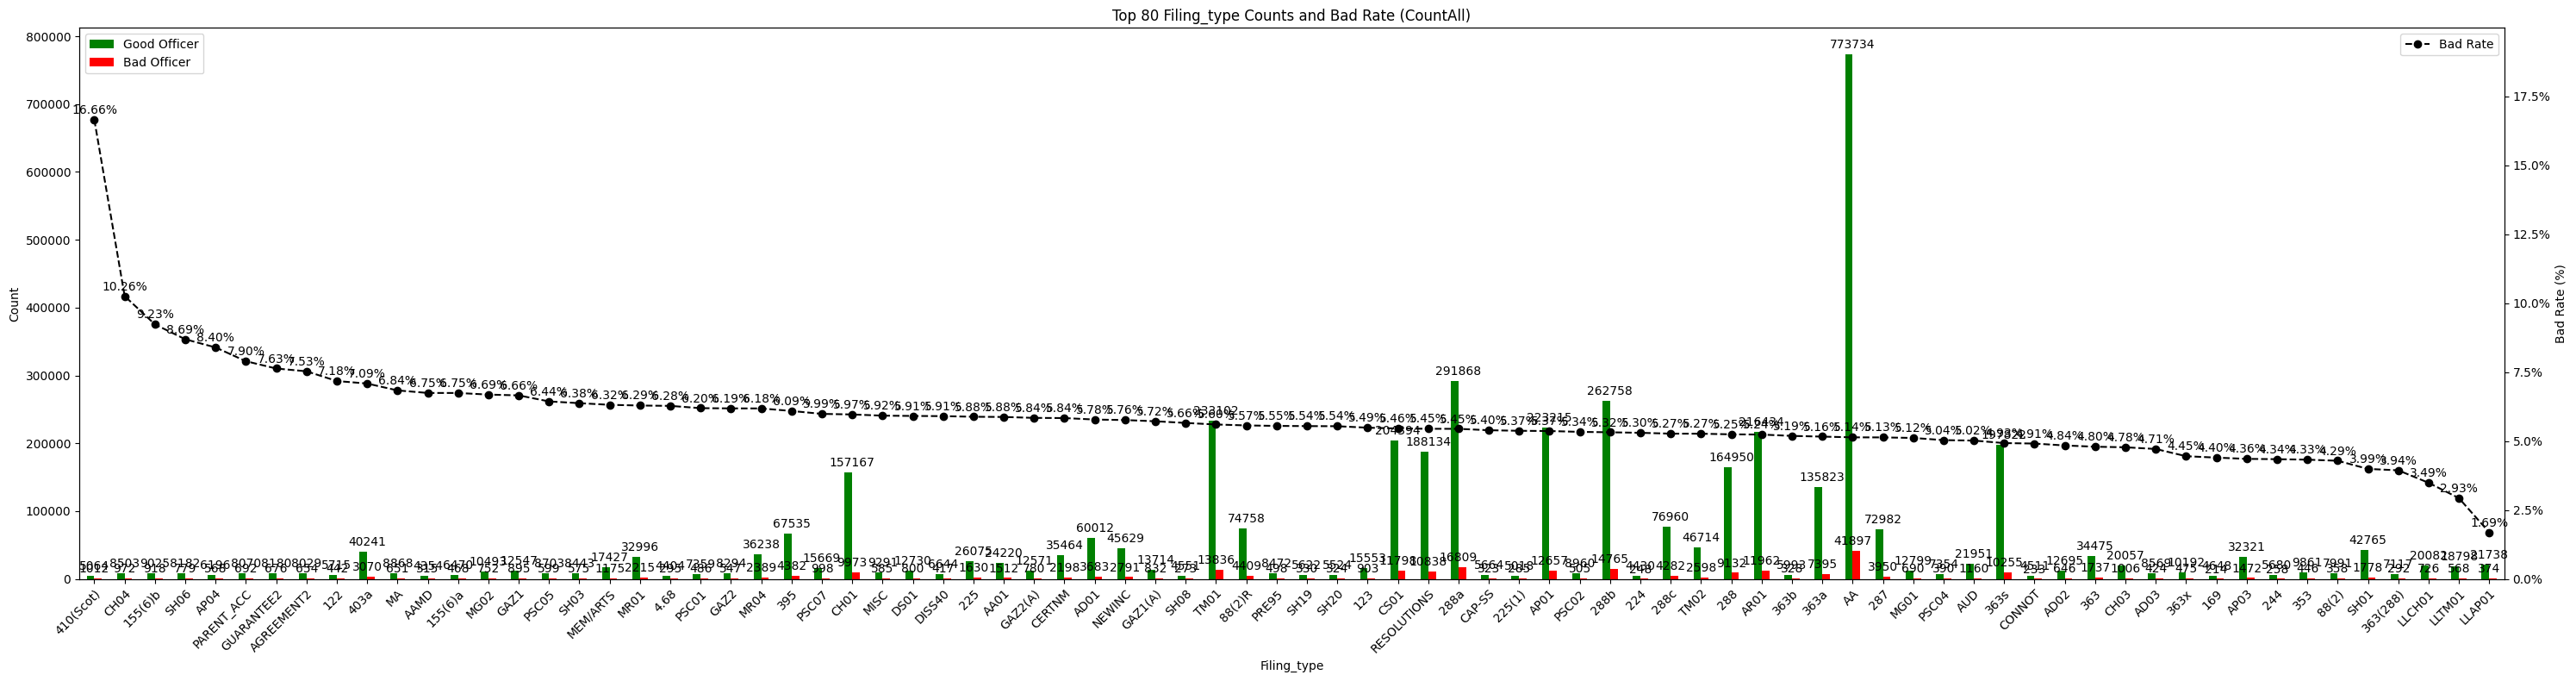

In [19]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_filing_data, bad_officer_company_filing_data, 'filing_type', count_type='count_all', top_num_values=80, fig_length=30
                            )


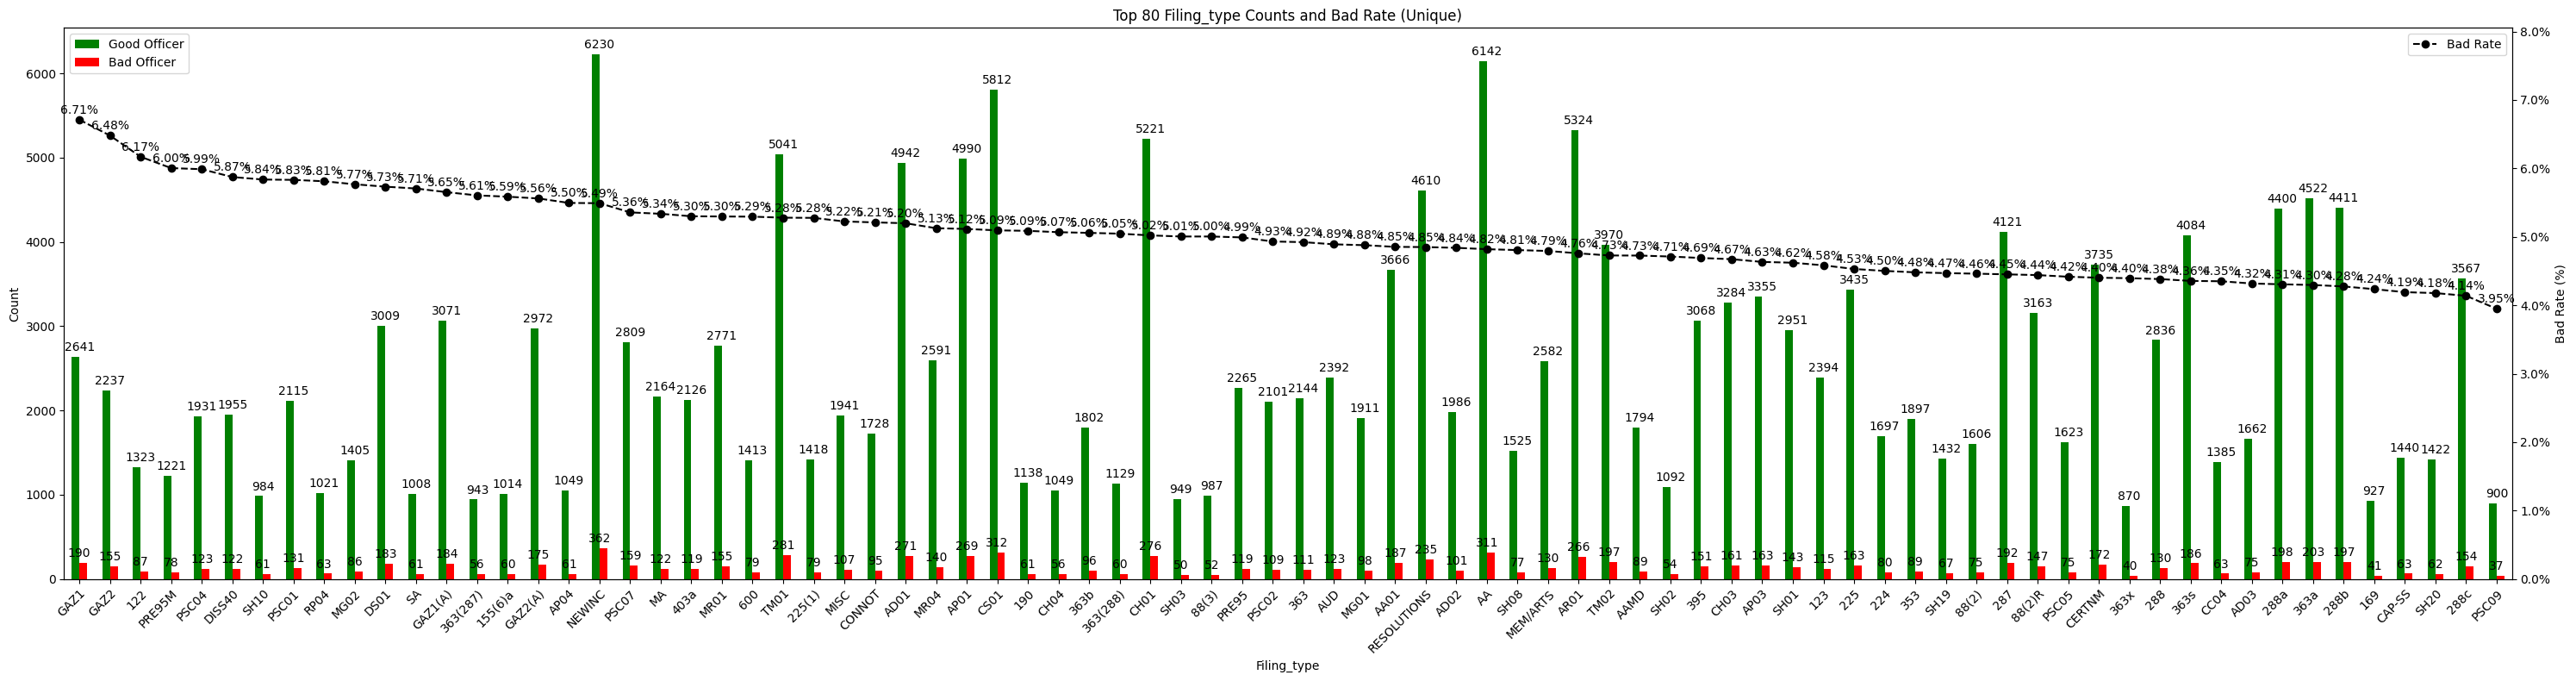

In [18]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_filing_data, bad_officer_company_filing_data, 'filing_type', count_type='unique', top_num_values=80, fig_length=30)


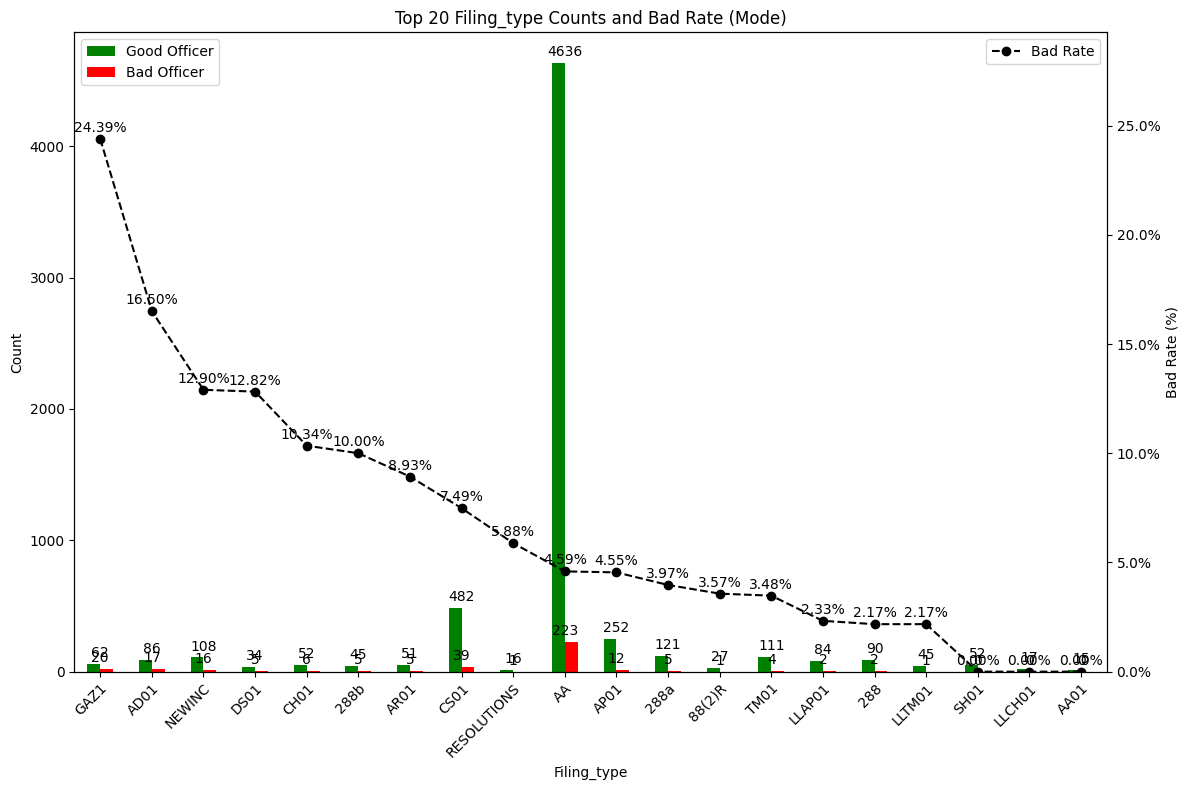

In [8]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_filing_data, bad_officer_company_filing_data, 'filing_type', count_type='mode', top_num_values=20)


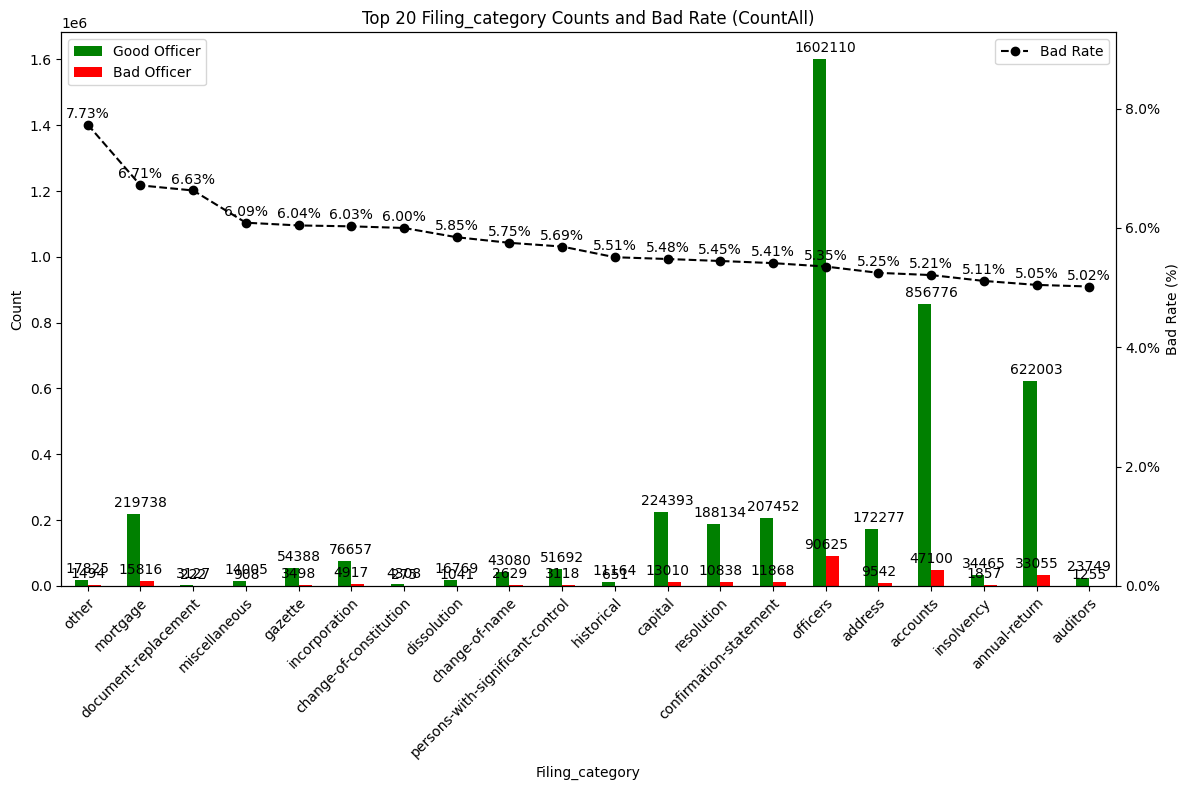

In [9]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_filing_data, bad_officer_company_filing_data, 'filing_category', count_type='count_all', top_num_values=20)


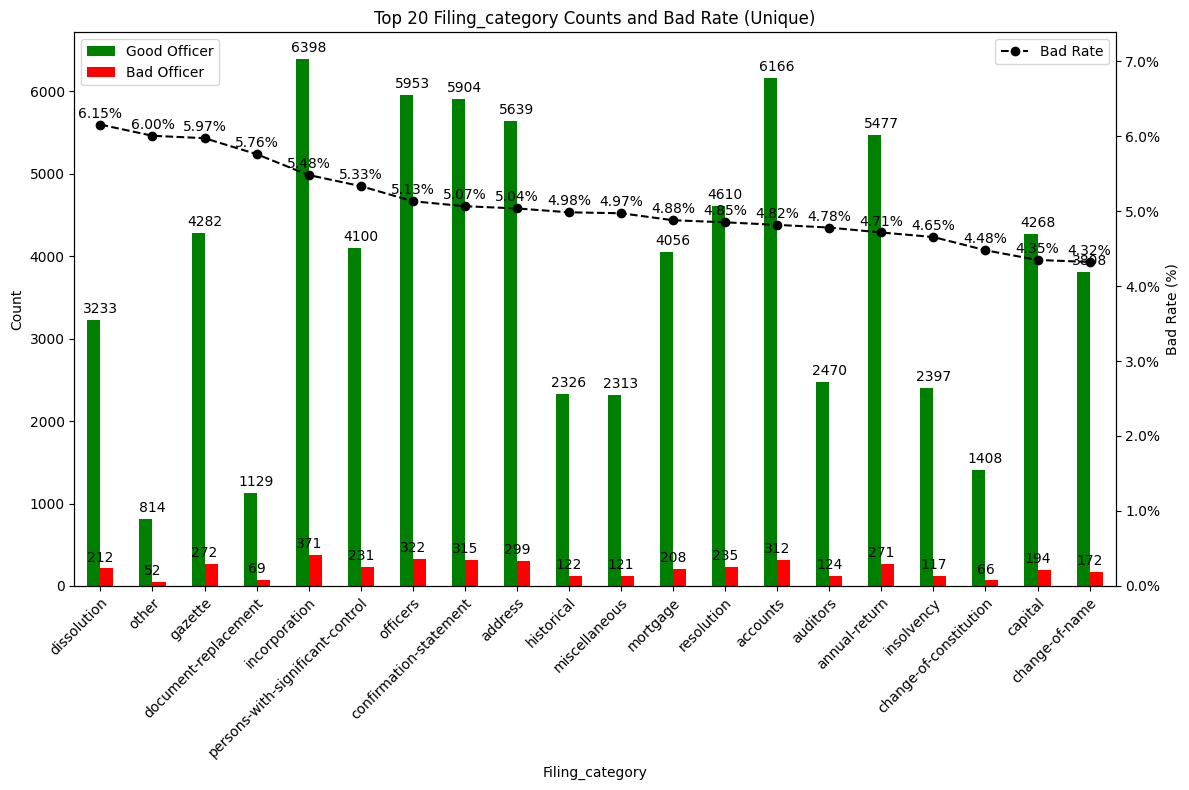

In [10]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_filing_data, bad_officer_company_filing_data, 'filing_category', count_type='unique', top_num_values=20)


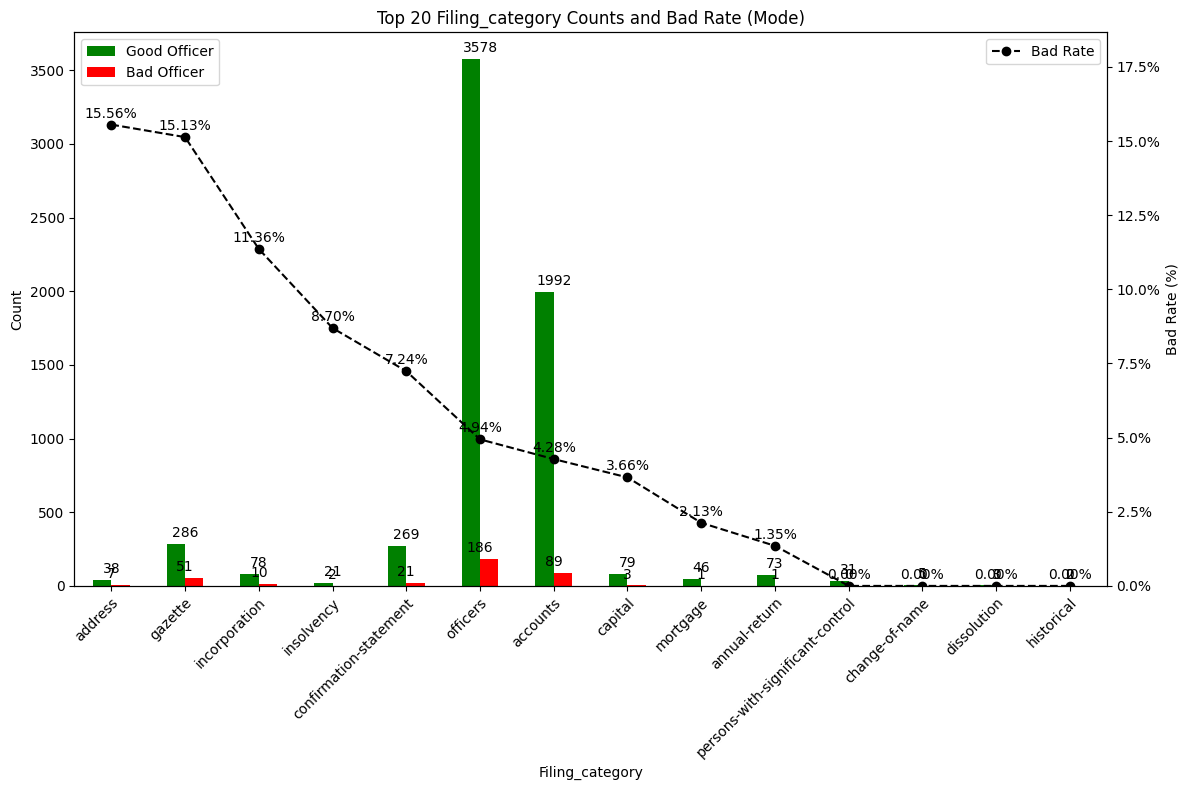

In [11]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_filing_data, bad_officer_company_filing_data, 'filing_category', count_type='mode', top_num_values=20)


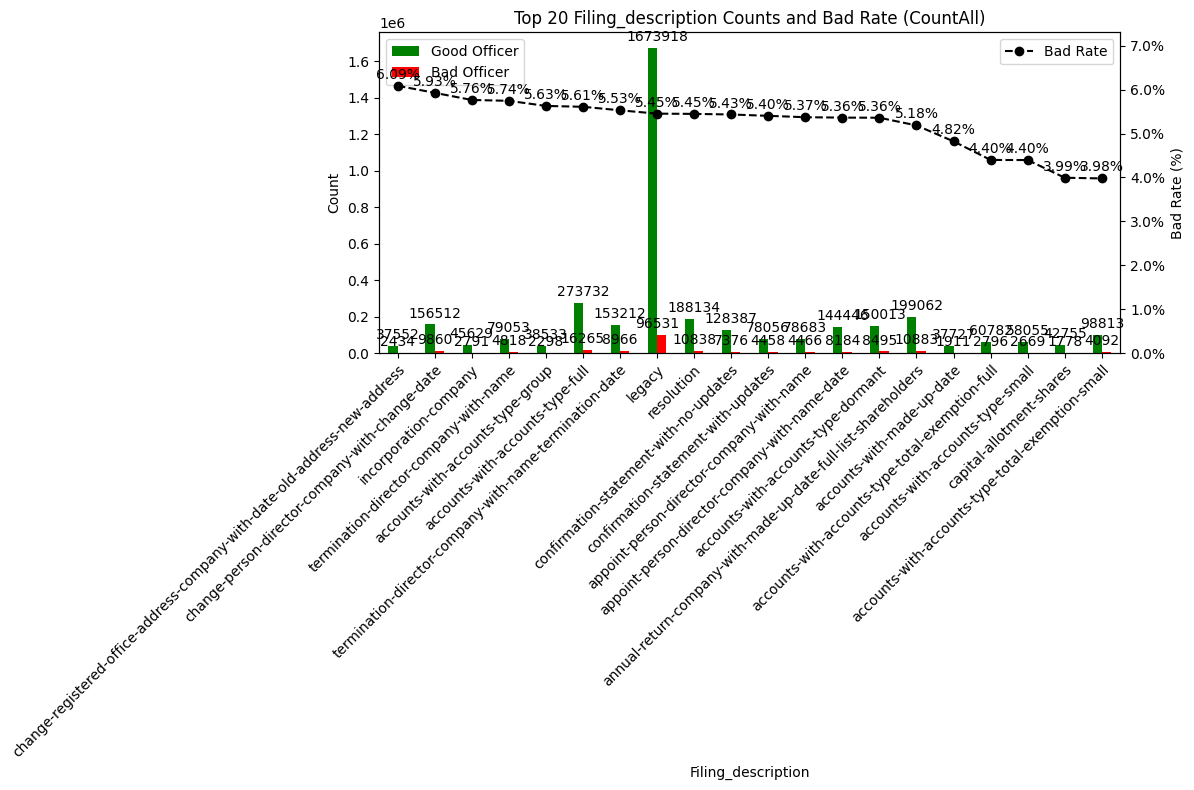

In [13]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_filing_data, bad_officer_company_filing_data, 'filing_description', count_type='count_all', top_num_values=20)

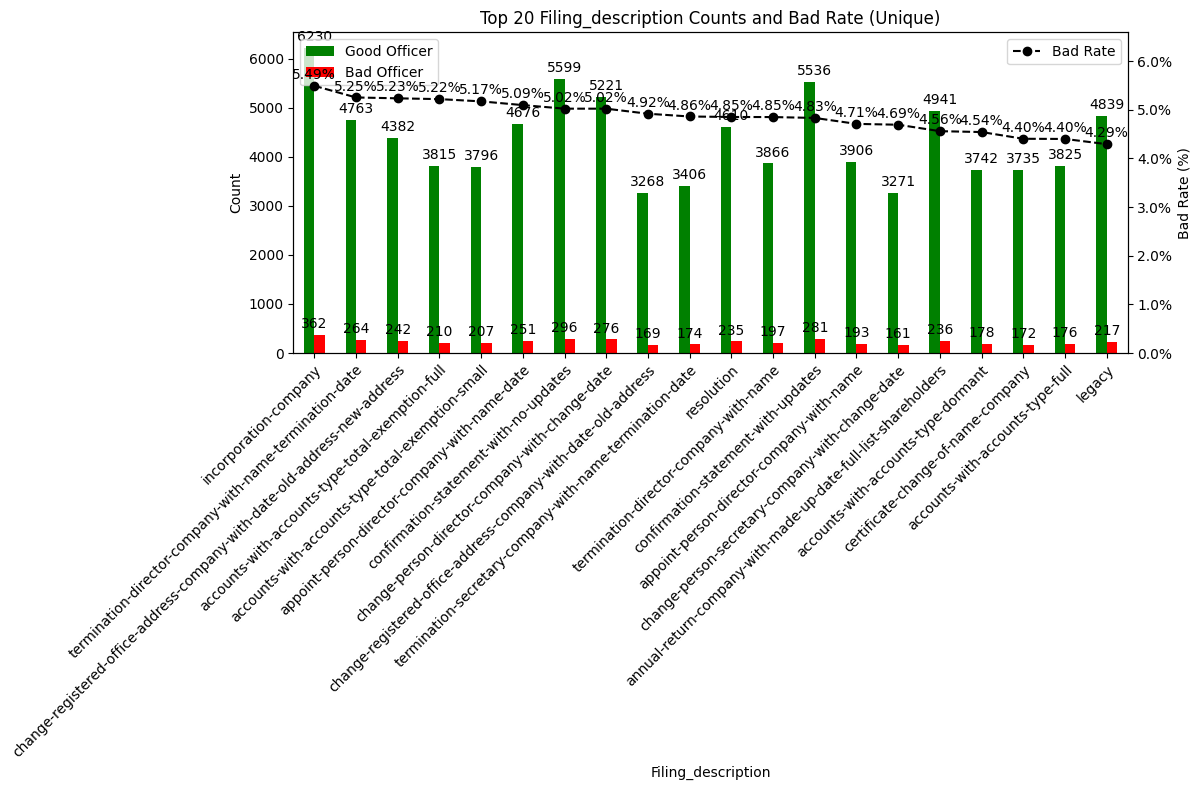

In [14]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_filing_data, bad_officer_company_filing_data, 'filing_description', count_type='unique', top_num_values=20)


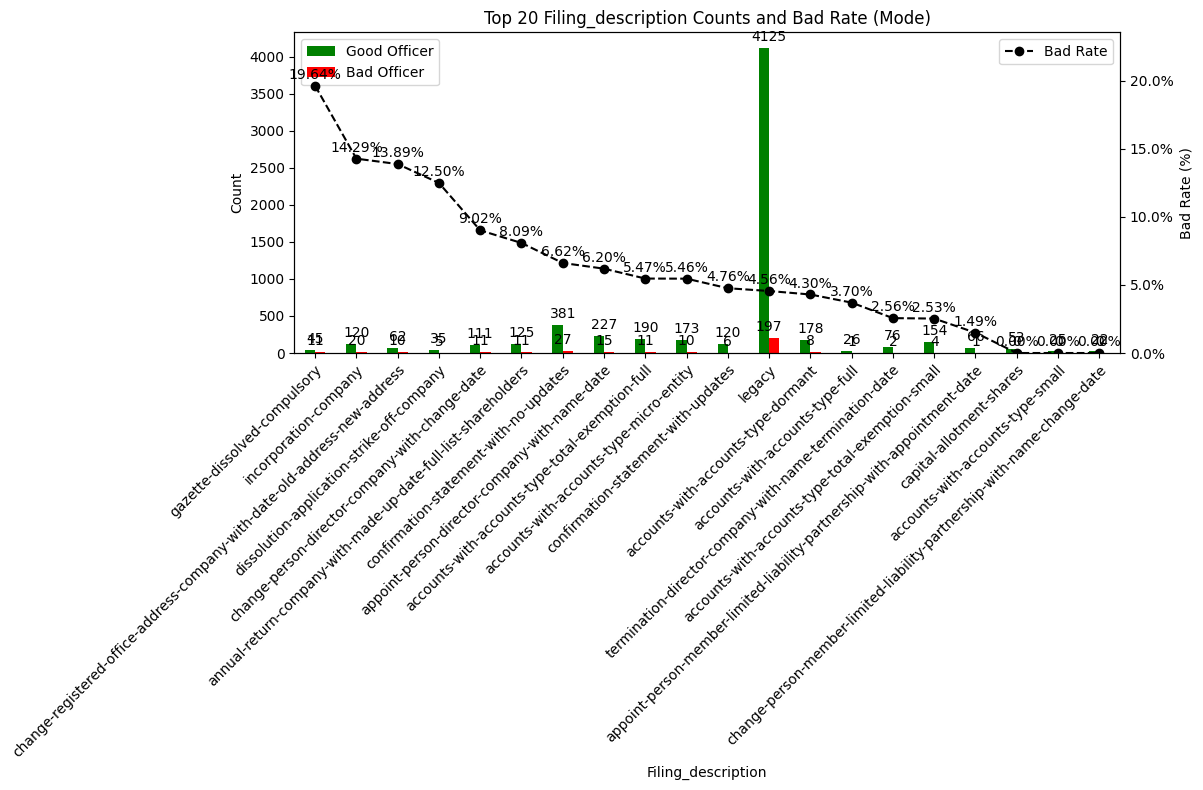

In [15]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_filing_data, bad_officer_company_filing_data, 'filing_description', count_type='mode', top_num_values=20)


In [21]:
#Extracting only the filings types that start with LIQ
good_officer_company_filing_data_liq = good_officer_company_filing_data[good_officer_company_filing_data['filing_type'].str.startswith('LIQ')]
bad_officer_company_filing_data_liq = bad_officer_company_filing_data[bad_officer_company_filing_data['filing_type'].str.startswith('LIQ')]


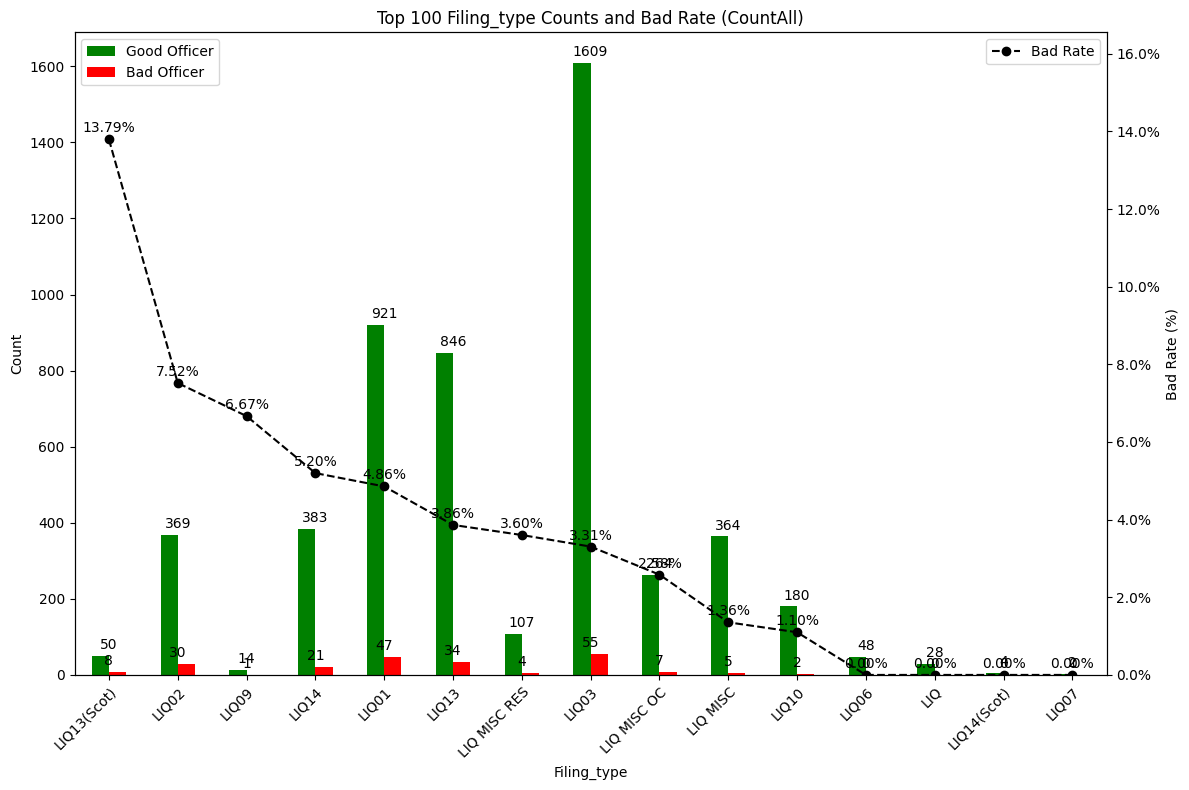

In [22]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_filing_data_liq, bad_officer_company_filing_data_liq, 'filing_type', count_type='count_all', top_num_values=100)


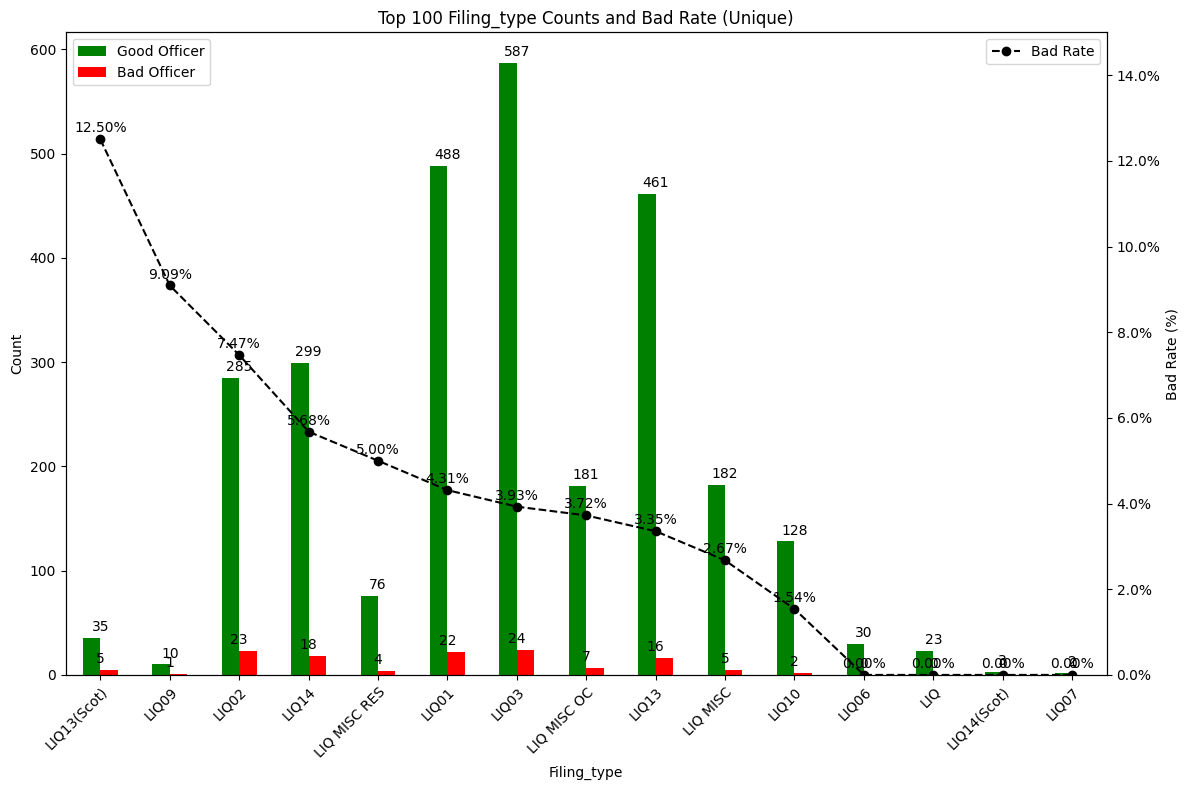

In [23]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_filing_data_liq, bad_officer_company_filing_data_liq, 'filing_type', count_type='unique', top_num_values=100)


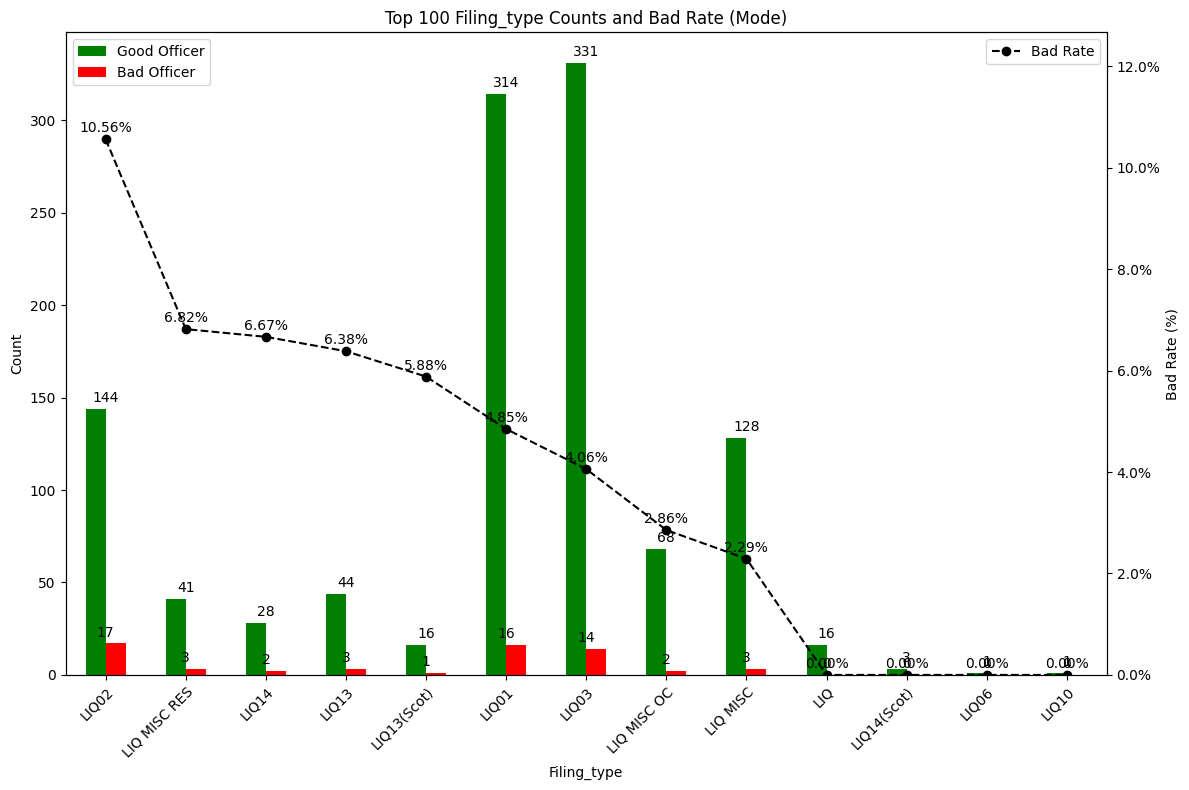

In [24]:
plot_attribute_counts_bad_rate_count_type(good_officer_company_filing_data_liq, bad_officer_company_filing_data_liq, 'filing_type', count_type='mode', top_num_values=100)
